In [1]:
###################
# Import Libraries
###################

import pandas as pd # coding but excel
import numpy as np # number stuff, creates arrays
import matplotlib.pyplot as plt # plotting
from scipy.optimize import curve_fit # curve fit class

In [2]:
##############
# Import data
##############

df_10k = pd.read_csv("ImpSpec_Data_1MOhms.csv") # create pandas dataframe
print(df_10k.head()) # print first 5 rows

         V0        VT  Phase  Frequency
0  0.707370  0.000156  -1.40      100.1
1  0.707324  0.000156  -1.35      114.4
2  0.707240  0.000156  -1.70      132.4
3  0.707206  0.000156  -1.80      152.4
4  0.707179  0.000156  -2.10      175.6


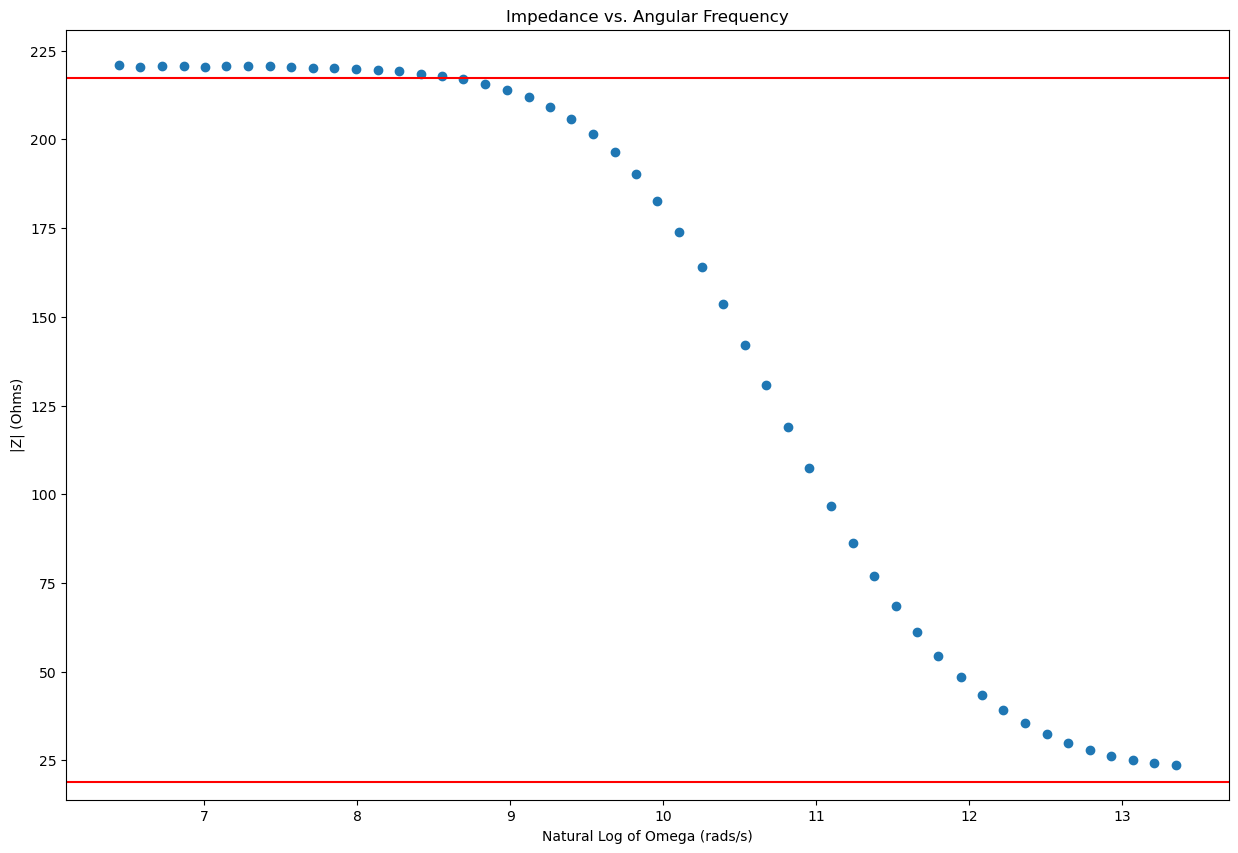

In [3]:
######################
# Setting Up The Math
######################

R_0 = 1E6 # Initial resistor value in series with our system under test - 10k as shown from title
R_1 = 217.2 # First resistor value in parrallel with R_2 and capacitor
R_2 = 20.8 # First resistor value in series with capacitor
V_sut = np.array(df_10k["VT"]) # Voltage of "system under test" which is the circuit being evaluated
I_sut = np.array(df_10k["V0"]/R_0) # Current of "system under test" which is the circuit being evaluated I = V_source / R_0
Z = np.array(abs(V_sut/I_sut)) # Absolute value of complex impedence (resistance)
w = np.array(df_10k["Frequency"]*(2*np.pi)) # Angular frequency of our dataset
R_T_parallel = ((R_1**-1) + (R_2**-1))**-1 # Total resistance of parallel circuit when capacitor is 0


############
# Plot data
############

plt.figure(figsize=(15,10))
plt.xlabel("Natural Log of Omega (rads/s)")
plt.ylabel("|Z| (Ohms)")
plt.title("Impedance vs. Angular Frequency")
plt.scatter(np.log(w), Z)
plt.axhline(R_1, c='r')
plt.axhline(R_T_parallel, c='r')
plt.show()

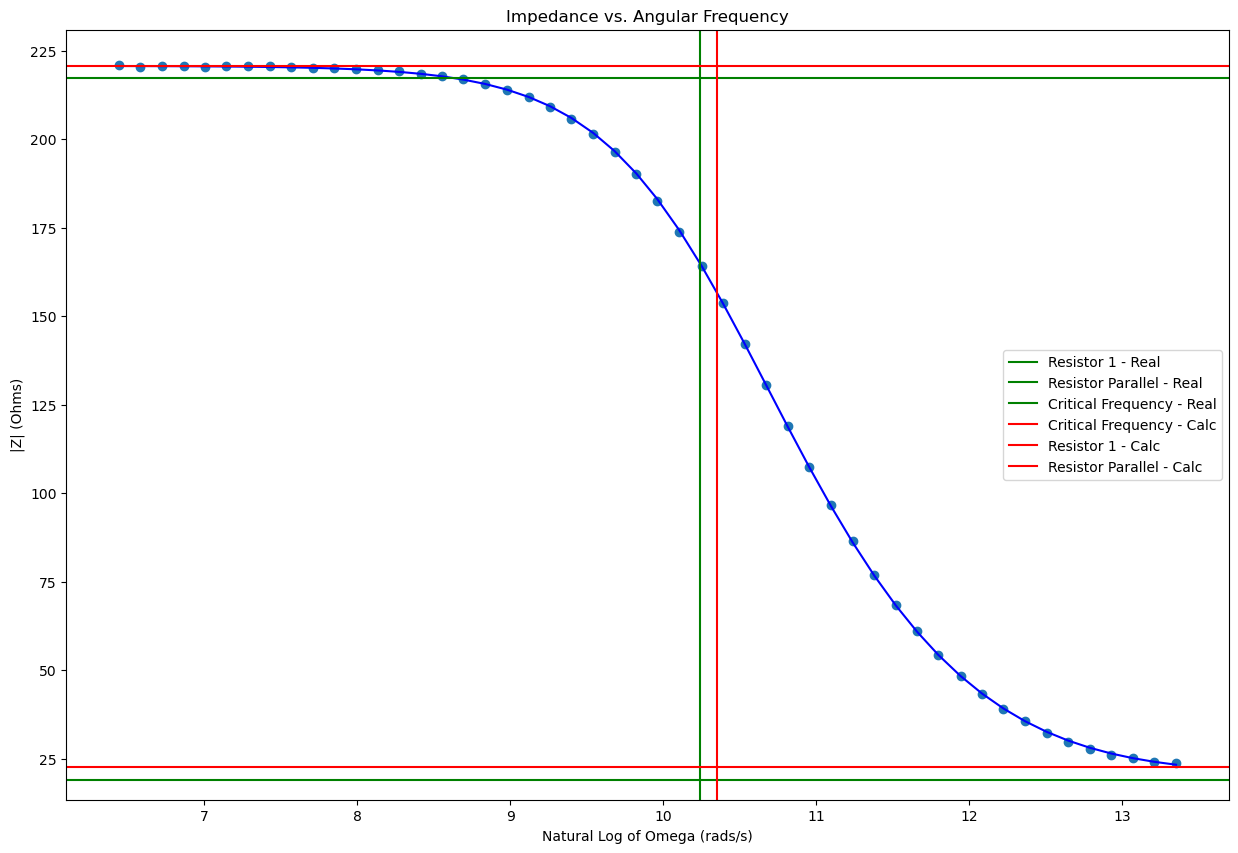

Fit Critical Angular Frequency (ln):  10.350678249115191 
 Fit R_1  220.70604313853394 
 Fit R_2:  22.757480249210946

 Uncertainty matrix (uncertainties lie along diagonal) squared: 
 [[ 9.63664388e+02 -7.54616425e-01 -1.48515396e+00]
 [-7.54616425e-01  2.40533407e-03  5.49649659e-04]
 [-1.48515396e+00  5.49649659e-04  1.57302210e-02]]


In [4]:
################
# Fit The Curve
################

def fit(w, w_c, R_1, R_2):
    Z_mag = R_1/(1+((w/w_c)**2)) * np.sqrt((1 + ((w/w_c)**2 * (1/(1+(R_1/R_2)))))**2 + ((w/w_c)**2 * ((R_1/R_2) / (1+(R_1/R_2)))**2))
    return Z_mag

popt, pcov = curve_fit(fit, w, Z, p0=[w_c:=100, R_1, R_2])
y_fit = fit(w, *popt)

w_c = popt[0]


############
# Plot data
############

plt.figure(figsize=(15,10))
plt.xlabel("Natural Log of Omega (rads/s)")
plt.ylabel("|Z| (Ohms)")
plt.title("Impedance vs. Angular Frequency")
plt.scatter(np.log(w), Z)
plt.plot(np.log(w), y_fit, c='b') # Fit function
plt.axhline(R_1, c='g', label='Resistor 1 - Real')
plt.axhline(R_T_parallel, c='g', label='Resistor Parallel - Real')
plt.axvline(np.log(28011.20), c='g', label='Critical Frequency - Real')
plt.axhline(popt[1], c='r', label='Critical Frequency - Calc')
plt.axhline(popt[2], c='r', label='Resistor 1 - Calc')
plt.axvline(np.log(w_c), c='r', label='Resistor Parallel - Calc')
plt.legend()
plt.show()


#####################
# Print fit data
# Print uncertainty
#####################
print("Fit Critical Angular Frequency (ln): ", np.log(w_c),
      "\n Fit R_1 ", popt[1],
      "\n Fit R_2: ", popt[2])

print("\n Uncertainty matrix (uncertainties lie along diagonal) squared: \n", pcov)

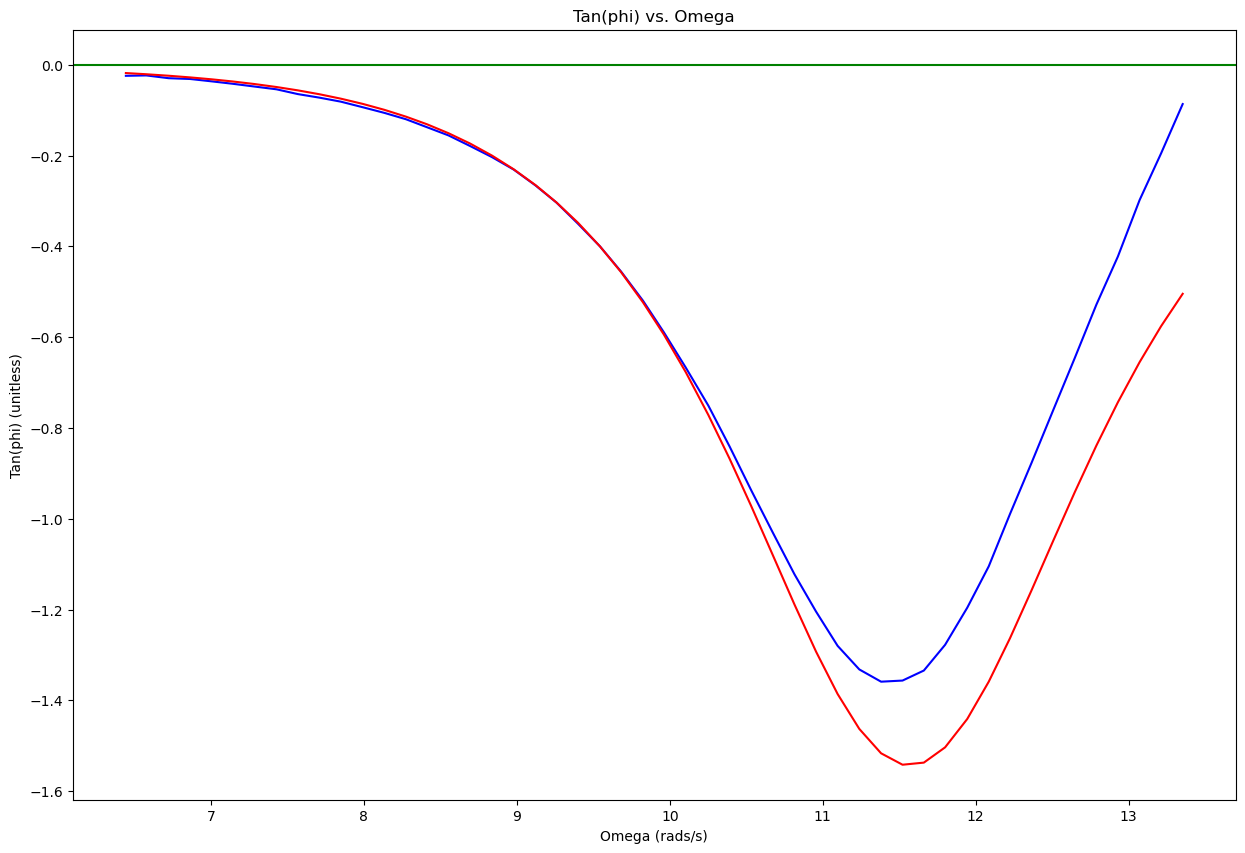

In [6]:
phi = np.array(df_10k["Phase"]*(np.pi/180))  # Phase angle from the system under test
tan_phi = np.tan(phi)
phi_calc = -((w/w_c) * ((R_1/R_2)/(1+(R_1/R_2)))) / (1 + ((w/w_c)**2 * (1/(1+(R_1/R_2)))))
#dtan_phi_dphi = 1 / (np.cos(phi)**2)  # First derivative


############
# Plot data
############

plt.figure(figsize=(15, 10))
plt.xlabel("Omega (rads/s)")
plt.ylabel("Tan(phi) (unitless)")
plt.title("Tan(phi) vs. Omega")

plt.axhline(y=0, c='g')

plt.plot(np.log(w), tan_phi, c='b', label="Tan(phi)")
plt.plot(np.log(w), phi_calc, c='r', label="Derived Tan(phi)")
#plt.plot(np.log(w), dtan_phi_dphi, c='g', label="First Derivative")